In [1]:
%matplotlib inline

W0721 23:49:06.498163 4780836288 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0721 23:49:06.964823 4780836288 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_flat_class_version/model/softmax_regression.py:95: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W0721 23:49:06.965458 4780836288 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_flat_class_version/model/softmax_regression.py:106: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 23:49:06.968693 4780836288 deprecation_wrapper.py:119]

grandient_step :  1000
loss :            1.0307789

grandient_step :  2000
loss :            0.97516465

grandient_step :  3000
loss :            0.8060715

grandient_step :  4000
loss :            0.801299

grandient_step :  5000
loss :            0.8020569

grandient_step :  6000
loss :            0.70662504

grandient_step :  7000
loss :            0.7512182

grandient_step :  8000
loss :            0.91623676

grandient_step :  9000
loss :            0.7926642

grandient_step :  10000
loss :            0.843889

grandient_step :  11000
loss :            0.86598885

grandient_step :  12000
loss :            0.87274396

grandient_step :  13000
loss :            0.8411726

grandient_step :  14000
loss :            0.731637

grandient_step :  15000
loss :            0.665053

grandient_step :  16000
loss :            0.7557547

grandient_step :  17000
loss :            0.7004828

grandient_step :  18000
loss :            0.6849123

grandient_step :  19000
loss :            0.6598637

g

W0721 23:50:17.563136 4780836288 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_flat_class_version/model/softmax_regression.py:216: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W0721 23:50:18.035365 4780836288 deprecation_wrapper.py:119] From /Users/sungchul/Dropbox/Git/machine_learning/mlp_mnist_flat_class_version/model/softmax_regression.py:202: The name tf.train.import_meta_graph is deprecated. Please use tf.compat.v1.train.import_meta_graph instead.

W0721 23:50:18.158963 4780836288 deprecation.py:323] From /Users/sungchul/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


train accuracy :  0.99705
test accuracy :  0.9842
train accuracy :  0.99705
test accuracy :  0.9842
[[ 973    1    0    0    1    1    2    1    1    0]
 [   0 1126    4    0    0    1    2    0    2    0]
 [   4    0 1015    4    1    0    1    5    2    0]
 [   0    0    3  996    0    3    0    4    2    2]
 [   0    0    4    0  967    0    3    1    2    5]
 [   2    0    0    3    1  877    3    1    4    1]
 [   4    2    1    1    2    4  942    0    2    0]
 [   1    4    8    2    1    0    0 1010    0    2]
 [   2    0    2    3    4    4    1    4  953    1]
 [   3    2    0    5    7    2    1    6    0  983]]


<Figure size 432x288 with 0 Axes>

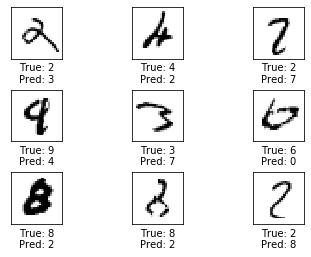

In [2]:
import numpy as np
import tensorflow as tf
from model.softmax_regression import SoftmaxRegression
from data_loading import mnist_flat_loader as mnist_flat
    
x_train, y_train, y_train_cls, x_test, y_test, y_test_cls, cls_names = mnist_flat.data_loading()
    
with tf.Session() as sess:
    a = SoftmaxRegression(x_train, y_train, y_train_cls, cls_names, sess,
                 lr=1e-4, epoch=100, batch_size=256, report_period=1000, np_seed=1, tf_seed=1,
                 drop_out_rate=0.3,
                 initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"),
                 save_path='result/model/model_1',
                 figure_save_dir='result/img',
                 activation=tf.nn.relu)
    a.train()
        
    print('train accuracy : ', a.compute_accuracy(x_train, y_train, y_train_cls))
    print('test accuracy : ', a.compute_accuracy(x_test, y_test, y_test_cls))
    
with tf.Session() as sess:
    a = SoftmaxRegression(x_train, y_train, y_train_cls, cls_names, sess,
                 lr=1e-4, epoch=100, batch_size=256, report_period=1000, np_seed=1, tf_seed=1,
                 drop_out_rate=0.3,
                 initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"),
                 save_path='result/model/model_1',
                 figure_save_dir='result/img',
                 activation=tf.nn.relu)
    a.restore()
        
    print('train accuracy : ', a.compute_accuracy(x_train, y_train, y_train_cls))
    print('test accuracy : ', a.compute_accuracy(x_test, y_test, y_test_cls))
    
    a.compute_confusion_matrix(x_test, y_test, y_test_cls)
    a.plot_9_images_with_false_prediction(x_test, y_test, y_test_cls)